In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import re
import time
from datetime import datetime

# File path
file_path = "Err.txt"

# Dictionary to store thread IDs and their timestamps
log_data = {}

# Regular expression pattern to extract timestamp and thread ID
pattern = re.compile(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d+) - .*? \[BetterBackground\] \(~(\d+)~\)")

# Read and process the file
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            timestamp_str, thread_id = match.groups()

            # Convert timestamp to milliseconds since epoch
            dt = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S,%f")
            epoch_ms = int(time.mktime(dt.timetuple()) * 1000 + dt.microsecond // 1000)

            # Store in dictionary
            if thread_id not in log_data:
                log_data[thread_id] = []
            log_data[thread_id].append(epoch_ms)


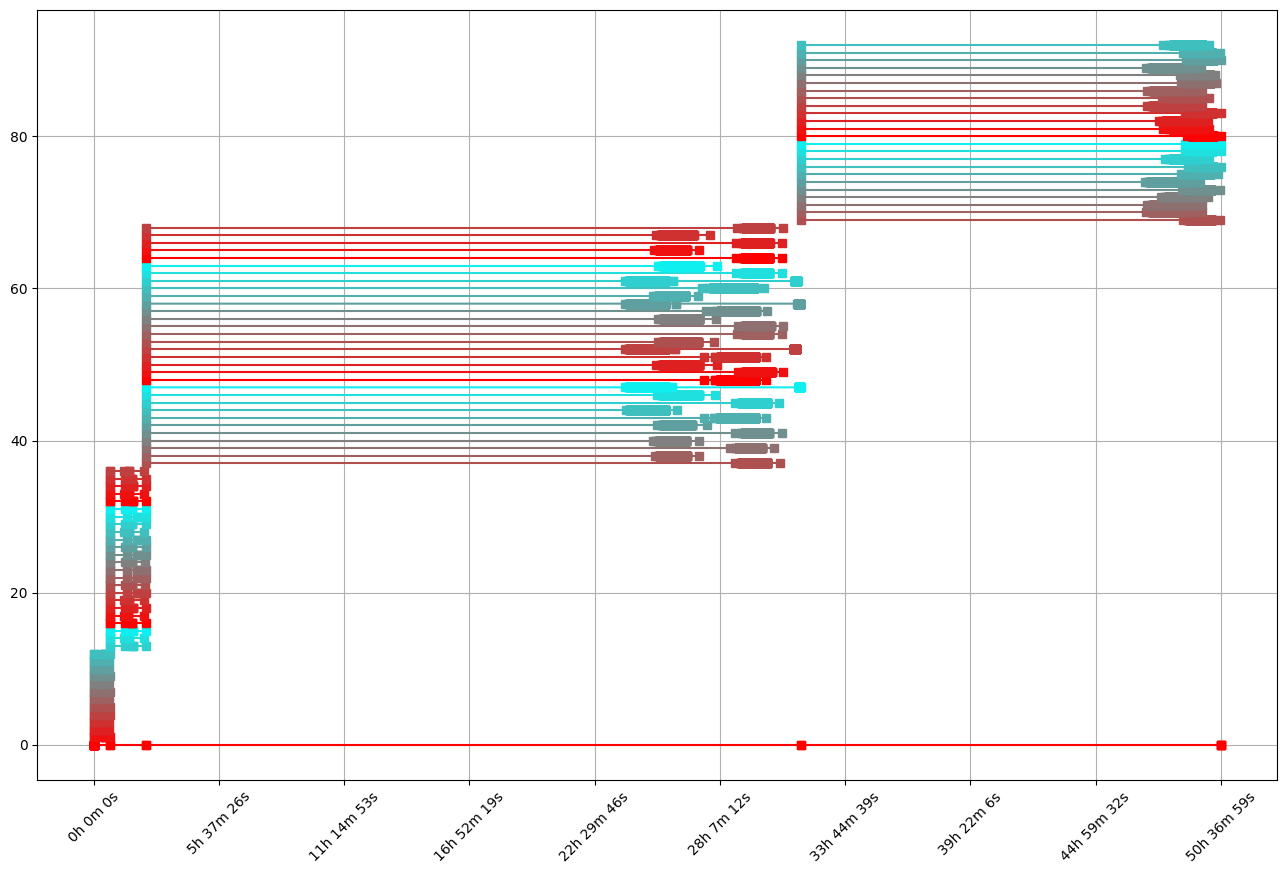

In [3]:
plt.figure(figsize=(16,10))

COLORS = [mpl.colors.to_hex(
		(1-j/16)*np.array(mpl.colors.to_rgb("red")) + j/16*np.array(mpl.colors.to_rgb("cyan"))
	) for j in range(16)]
for i,key in enumerate(log_data):
	y = (np.array(log_data[key]) - log_data["1858"][0])/1000
	x = i*np.ones_like(y)
	plt.plot(y,x,marker="s",color=COLORS[i%16])

x_ticks = np.linspace(0, max(max(times) - log_data["1858"][0] for times in log_data.values()) / 1000, num=10)
x_labels = [f"{int(t // 3600)}h {int((t % 3600) // 60)}m {int(t % 60)}s" for t in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45)
plt.grid(True)
plt.show()

In [1]:
import logging
import jwst.pipeline

logger = logging.getLogger("stpipe")

# Get the first handler (assuming at least one handler is attached)
if logger.hasHandlers():
	handler = logger.handlers[0]
	formatter = handler.formatter  # This is the formatter used by the handler
	print(formatter._fmt)
else:
	print("No handlers found for the logger.")

%(asctime)s - %(name)s - %(levelname)s - %(message)s


In [1]:
from BNBG.utils.logger import logConsole

logConsole("test")


CRDS folder at /home/tim-dewachter/Documents/Thèse/BetterNIRSpecBackground/CRDS


2025-03-13 17:08:01,496 - stpipe - INFO - [32045]  [BetterBackground] : test


Logger loaded
True
